### Decision Tree 

#### 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##### 2. Exploratory Data Analysis (EDA):

In [2]:
data = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


##### 3. Feature Engineering:

In [4]:
y = data['num']
X = data.drop('num', axis=1)

In [5]:
non_numeric_cols = X.select_dtypes(exclude=['int64', 'float64']).columns

for col in non_numeric_cols:
    X[col] = X[col].astype(str)

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col])

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    int32  
 2   cp        908 non-null    int32  
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    int32  
 6   restecg   908 non-null    int32  
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    int32  
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    int32  
 11  thal      908 non-null    int32  
dtypes: float64(1), int32(7), int64(4)
memory usage: 60.4 KB


##### 4. Decision Tree Classification:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [10]:
y_pred = dt_model.predict(X_test)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.554945054945055


In [12]:
confusion_matrix(y_test, y_pred)

array([[67, 15,  6,  1,  0],
       [16, 26,  5,  1,  0],
       [ 3, 11,  6,  2,  0],
       [ 2,  9,  4,  2,  0],
       [ 0,  5,  0,  1,  0]], dtype=int64)

##### 5. Hyperparameter Tuning:

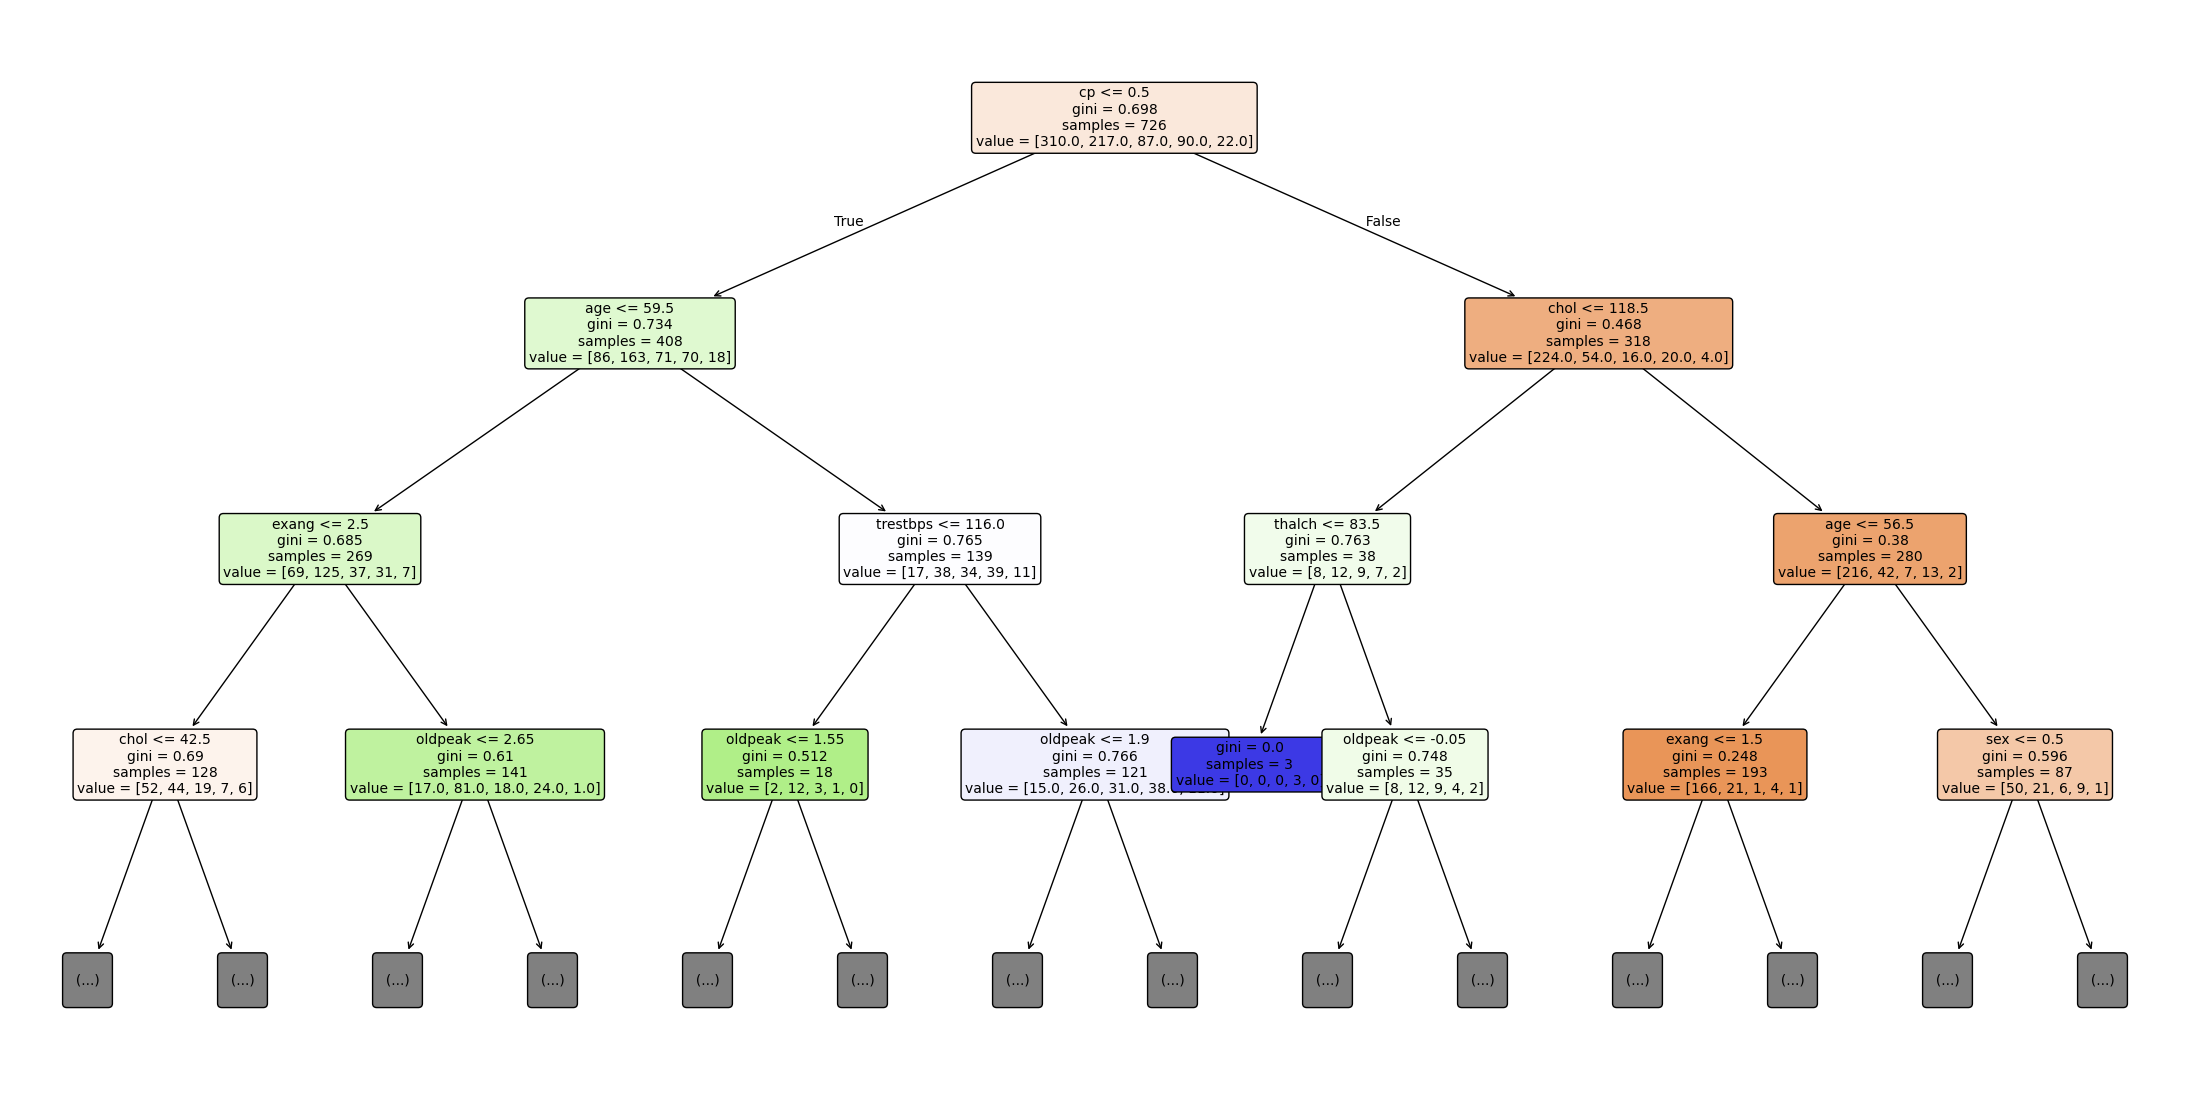

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(28, 14))   
plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10,               
    max_depth=3                
)
plt.show()

##### 6: Feature Importance Analysis

In [14]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
2,cp,0.356944
4,chol,0.160102
0,age,0.132070
8,exang,0.085733
9,oldpeak,0.067636
7,thalch,0.047485
11,thal,0.043902
3,trestbps,0.041369
1,sex,0.033824
6,restecg,0.030935


##### 7: Plot Feature Importance

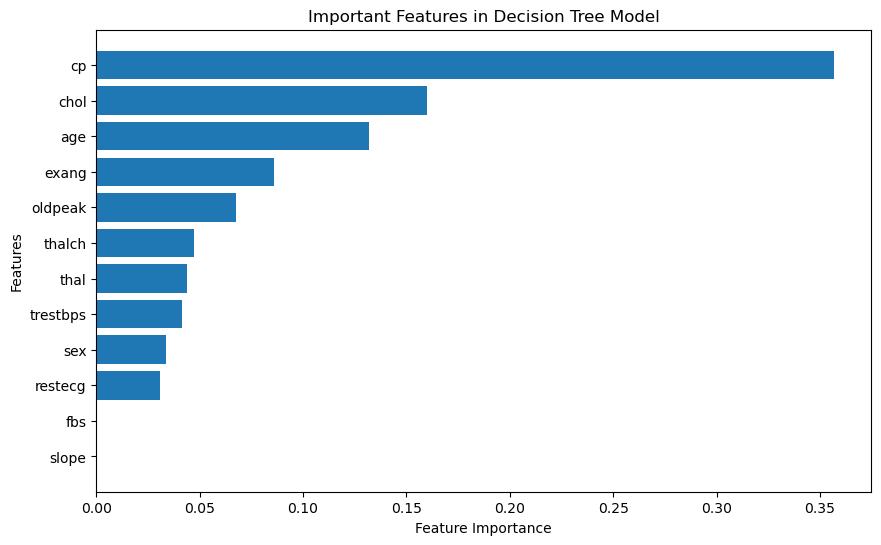

In [15]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Important Features in Decision Tree Model")
plt.gca().invert_yaxis()
plt.show()

### Interview Questions:

#### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

1. Common hyperparameters of Decision Tree models and their impact

1.max_depth

-Controls the maximum depth of the tree.

-Smaller depth → prevents overfitting but may underfit.

-Larger depth → captures complex patterns but may overfit.

2.min_samples_split

-Minimum number of samples required to split an internal node.

-Higher value → simpler tree, reduces overfitting.

-Lower value → more splits, may overfit.

3.min_samples_leaf

-Minimum samples required at a leaf node.

-Larger value → smoother predictions, better generalization.

-Smaller value → sensitive to noise.

4.max_features

-Number of features considered when looking for the best split.

-Smaller value → reduces correlation between trees (useful in ensembles).

-Larger value → may improve accuracy but risks overfitting.

5.criterion

-Metric used to measure split quality (e.g., Gini, Entropy).

-Affects how the tree selects the best splits.

6.max_leaf_nodes

-Limits the number of leaf nodes.

-Helps control model complexity and overfitting.

#### 2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding

1.Converts categorical values into integer labels.

2.Uses a single column to represent all categories.

3.Introduces an artificial numerical order between categories.

4.Suitable for ordinal data (e.g., Low, Medium, High).

5.Can mislead models that assume numerical meaning in labels.

6.Memory-efficient and computationally faster.

One-Hot Encoding

1.Converts each category into a separate binary column.

2.Uses multiple columns for a single categorical feature.

3.Does not introduce any order between categories.

4.Best suited for nominal data (e.g., color, city).

5.Prevents incorrect ranking assumptions by models.

6.Increases dimensionality and memory usage.